In [1]:
from sympy import *
from sympy.abc import r,x,y,z
from scipy.integrate import quad, nquad
import matplotlib.pyplot as plt
%matplotlib inline
init_printing()

# Energy of the Hydrogen Atom
The variational principle states a trial wavefunction will have an energy greater than or equal to the ground state energy.
$$\frac{\int \psi H \psi}{ \int \psi^2}  \ge E_0$$

First consider the hydogen atom. Let us use a trial wavefunction that is not the exact ground state.

In [2]:
beta = Symbol('beta')
R_T = exp(-r - beta*r*r)
R_T

The Hamiltonian for this system is
$$-\frac{1}{2} \nabla^2 - \frac{1}{r}$$
The first term is the kinetic energy of the electron, and the second term is the Coulomb attraction between the electron and proton.

The first step is to compute the derivative of the trial wavefunction in spherical coordinates

In [3]:
def del_spherical(e, r):
    """Compute Laplacian for expression e with respect to symbol r.
        Currently works only with radial dependence"""
    t1 = r*r*diff(e, r)
    t2 = diff(t1, r)/(r*r)
    return simplify(t2)

In [4]:
del1 = del_spherical(R_T, r)


Construct $\psi H \psi$

In [18]:
H = -1/S(2) * R_T * del1  - R_T*R_T/r

In [19]:
simplify(H)

The integration occurs in 3D over the electron coordinates.  Because the integrand only has a dependence on $r$, it can be converted to spherical coordinates, and reduced to a 1D integral over $r$. (There should be an additional factor of $4 \pi$, but it will cancel since it occurs in the numerator and denominator)

In [20]:
h1 = simplify(r*r*H)

Substitute a concrete value for $\beta$.

In [21]:
h2 = h1.subs(beta, 0.1)

Perform the integral

In [22]:
num = integrate(h2, (r, 0, oo)).evalf()
num

Also construct and integrate the denominator (the normalization).

In [23]:
norm1 = r*r*R_T*R_T
norm2 = norm1.subs(beta, 0.1)
norm3 = simplify(norm2)

In [24]:
denom = integrate(norm3, (r, 0, oo)).evalf()
simplify(denom).evalf()

In [25]:
E = num/denom
E

And, as expected, energy is greater than the exact ground state energy of -0.5 Hartree.

## Find the minimum energy
Collect all the steps for computing the energy into a single function.   Even though this particular integral could be done symbolically, use numerical integration instead.

In [29]:
def compute_energy(R_T, beta_val):
    """Energy given a value for beta"""
    
    # Normalization integrand (denominator)
    norm1 = r*r*R_T*R_T
    norm2 = norm1.subs(beta, beta_val)
    norm3 = simplify(norm2)

    # Integrand for the numerator
    del1 = del_spherical(R_T, r)
    # Construct psi * H * psi
    H = -1/S(2) * R_T * del1  - R_T*R_T/r
    h1 = simplify(r*r*H)
    h2 = h1.subs(beta, beta_val)
    
    lim = 20.0
    
    denom_func = lambdify([r], norm3)
    denom_res = quad(denom_func, 0.0, lim)
    
    num_func = lambdify([r], h2)
    num_res = quad(num_func, 0.0, lim)

    e = num_res[0]/denom_res[0]

    return e
   

Now the energy can be computed vs. $\beta$, and we can find the minimum energy.  In this case, the minimum occurs at $\beta = 0$, which we know is the exact wavefunction for the hydrogen atom.

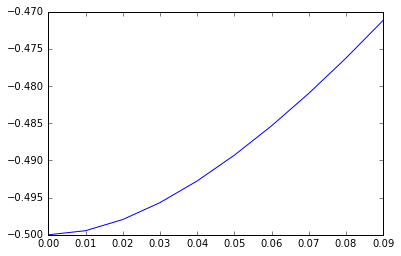

In [30]:
energies = []
betas = []
for i in range(10):
    beta_val = i*.01
    e = compute_energy(R_T, beta_val)
    betas.append(beta_val)
    energies.append(e)

plt.plot(betas, energies)